In [1]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
!pip install scipy

In [2]:
#loading libraries
import pandas as pd
import scanpy as sc
import scipy.io
from scipy import sparse
import numpy as np
import os

In [48]:
#Retrieving data
# creating a directory for the data files 
!mkdir p

#Cluster 
!curl -o p/clustering.tsv "https://www.ebi.ac.uk/gxa/sc/experiment/E-CURD-4/download?fileType=cluster"

#raw counts
!curl -o p/raw_counts.zip "https://www.ebi.ac.uk/gxa/sc/experiment/E-CURD-4/download/zip?fileType=quantification-raw"

#experiment design
!curl -o p/experiment_design.tsv "https://www.ebi.ac.uk/gxa/sc/experiment/E-CURD-4/download?fileType=experiment-design"

A subdirectory or file p already exists.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  477k  100  477k    0     0   478k      0 --:--:-- --:--:-- --:--:--  479k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  776k    0  776k    0     0   757k      0 --:--:--  0:00:01 --:--:--  758k
100 8135k    0 8135k    0     0  4017k      0 --:--:--  0:00:02 --:--:-- 4019k
100 13.0M    0 13.0M    0     0  4429k      0 --:--:--  0:00:03 --:--:-- 4432k
100 18.2M

In [57]:
print(os.listdir('p'))

['clustering.tsv', 'experiment_design.tsv', 'raw_counts', 'raw_counts.zip']


In [49]:
print(os.getcwd())

C:\Users\vnove\OneDrive\Documents\Winter_25\PCDA\Winter_25\PCDA\Bioinformatics


In [55]:
#Checking data structure and format
clustering_data = pd.read_csv('p/clustering.tsv', sep='\t')
print("Clustering data shape: ", clustering_data.shape)
print("\nFirst 5 Rows: ")
print(clustering_data.head())
print("\mColumns:", list(clustering_data.columns))

experiment_data = pd.read_csv('p\experiment_design.tsv', sep='\t')
print("\nExpeirment design data shape: ", experiment_data.shape)
print("n'First 5 rows: ")
print(experiment_data.head())
print("\nColumns: ", list(experiment_data.columns))

Clustering data shape:  (9, 10781)

First 5 Rows: 
   sel.K   K  SRR8206654-AAAAACCGAACG  SRR8206654-AAAACGCATGCG  \
0  False   6                        2                        5   
1  False   8                        2                        5   
2  False  15                        3                        1   
3  False  17                       11                        5   
4   True  21                        7                        6   

   SRR8206654-AAAACGTACCAA  SRR8206654-AAAACGTACCAC  SRR8206654-AAAACGTACCAG  \
0                        3                        3                        3   
1                        3                        3                        3   
2                        7                        7                        7   
3                        6                        6                        6   
4                        4                        4                        4   

   SRR8206654-AAAACGTACCAT  SRR8206654-AAAACGTAGCCA  SRR8206654-AAAAGTT

In [3]:
# loading files
try:
    data = np.loadtxt('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx', skiprows=1)
    
    # The first row contains dimensions: rows, columns, non-zero entries
    dimensions = np.loadtxt('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx', max_rows=1)
    num_rows = int(dimensions[0])
    num_cols = int(dimensions[1])
    num_entries = int(dimensions[2])
    
    print(f"Matrix dimensions: {num_rows} rows x {num_cols} columns with {num_entries} non-zero entries")
    
    # Create a sparse matrix (COO format)
    row_indices = data[:, 0].astype(int) - 1
    col_indices = data[:, 1].astype(int) - 1
    values = data[:, 2]
    
    counts_matrix = sparse.coo_matrix((values, (row_indices, col_indices)), 
                                     shape=(num_rows, num_cols))
    
    print("Successfully created sparse matrix!")
    print(f"Matrix shape: {counts_matrix.shape}")
    print(f"Number of non-zero entries: {counts_matrix.nnz}")
    print(f"Sparsity: {counts_matrix.nnz / (counts_matrix.shape[0] * counts_matrix.shape[1]):.4%}")
    
except Exception as e:
    print(f"Error: {e}")
    
    # small subset to view file
    try:
        with open('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx', 'r') as f:
            first_lines = [f.readline() for _ in range(5)]
        print("First 5 lines of the file:")
        for line in first_lines:
            print(line.strip())
    except Exception as e2:
        print(f"Could not open file: {e2}")

Error: could not convert string '%%MatrixMarket' to float64 at row 0, column 1.
First 5 lines of the file:
%%MatrixMarket matrix coordinate real general
22134 10779 17487103
10 1 1
14 1 1
22 1 1


In [4]:
# creating function with the 
matrix_path = 'p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx'

# Load the sparse matrix 
counts_sparse = scipy.io.mmread(matrix_path)

# Load the row and column names
with open('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx_rows', 'r') as f:
    gene_ids = [line.strip() for line in f]
    
with open('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx_cols', 'r') as f:
    sample_ids = [line.strip() for line in f]

# Print information
print(f"Matrix shape: {counts_sparse.shape}")
print(f"Number of genes: {len(gene_ids)}")
print(f"Number of samples: {len(sample_ids)}")
print(f"Sparsity: {counts_sparse.nnz / (counts_sparse.shape[0] * counts_sparse.shape[1]):.4%} non-zero values")
counts_csr = counts_sparse.tocsr()

# small DataFrame with a subset of the data
subset_size = 5
small_df = pd.DataFrame(
    counts_csr[:subset_size, :subset_size].toarray(), 
    index=gene_ids[:subset_size] if len(gene_ids) >= subset_size else None,
    columns=sample_ids[:subset_size] if len(sample_ids) >= subset_size else None
)

print("\nFirst 5 genes for first 5 samples:")
print(small_df)

Matrix shape: (22134, 10779)
Number of genes: 22134
Number of samples: 10779
Sparsity: 7.3296% non-zero values

First 5 genes for first 5 samples:
                      SRR8206654-AAAAACCGAACG  SRR8206654-AAAACGCATGCG  \
AT1G01010\tAT1G01010                      0.0                      4.0   
AT1G01020\tAT1G01020                      0.0                      0.0   
AT1G01030\tAT1G01030                      0.0                      0.0   
AT1G01040\tAT1G01040                      0.0                      0.0   
AT1G01050\tAT1G01050                      0.0                      0.0   

                      SRR8206654-AAAACGTACCAA  SRR8206654-AAAACGTACCAC  \
AT1G01010\tAT1G01010                      1.0                      0.0   
AT1G01020\tAT1G01020                      0.0                      0.0   
AT1G01030\tAT1G01030                      0.0                      0.0   
AT1G01040\tAT1G01040                      0.0                      0.0   
AT1G01050\tAT1G01050                  

In [5]:
# load as a text file
data = np.loadtxt('p/raw_counts/E-CURD-4.aggregated_filtered_counts.mtx', skiprows=1)
print("Successfully loaded with numpy!")
print(f"Shape: {data.shape}")
print(data[:5, :5])  # Show a small subset


Successfully loaded with numpy!
Shape: (17487104, 3)
[[2.2134000e+04 1.0779000e+04 1.7487103e+07]
 [1.0000000e+01 1.0000000e+00 1.0000000e+00]
 [1.4000000e+01 1.0000000e+00 1.0000000e+00]
 [2.2000000e+01 1.0000000e+00 1.0000000e+00]
 [5.6000000e+01 1.0000000e+00 1.0000000e+00]]


In [95]:
#Adjusting settings for warnings and figures
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [6]:
#Data Normalization using scanpy
adata = sc.AnnData(
    X=counts_sparse.tocsr(), 
    obs=pd.DataFrame(index=gene_ids), 
    var=pd.DataFrame(index=sample_ids)
)

In [7]:
adata = adata.transpose()

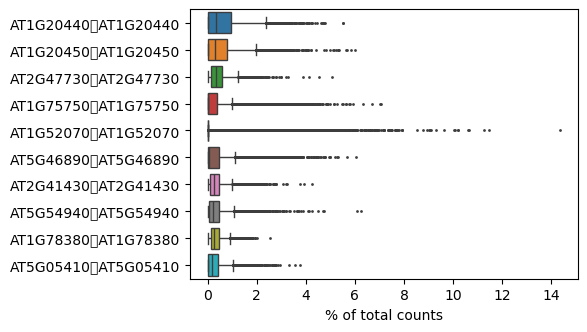

In [9]:
sc.pl.highest_expr_genes(adata, n_top = 10)

In [8]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [9]:
adata.var["atm"] = adata.var_names.str.contains("ATM", case=False)
adata.var["cp"] = adata.var_names.str.contains("ATC", case=False)
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["atm", "cp"], percent_top=None, log1p=False, inplace=True
)

In [118]:
adata

AnnData object with n_obs × n_vars = 13272 × 10779
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_atm', 'pct_counts_atm', 'total_counts_cp', 'pct_counts_cp'
    var: 'n_cells', 'atm', 'cp', 'tm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

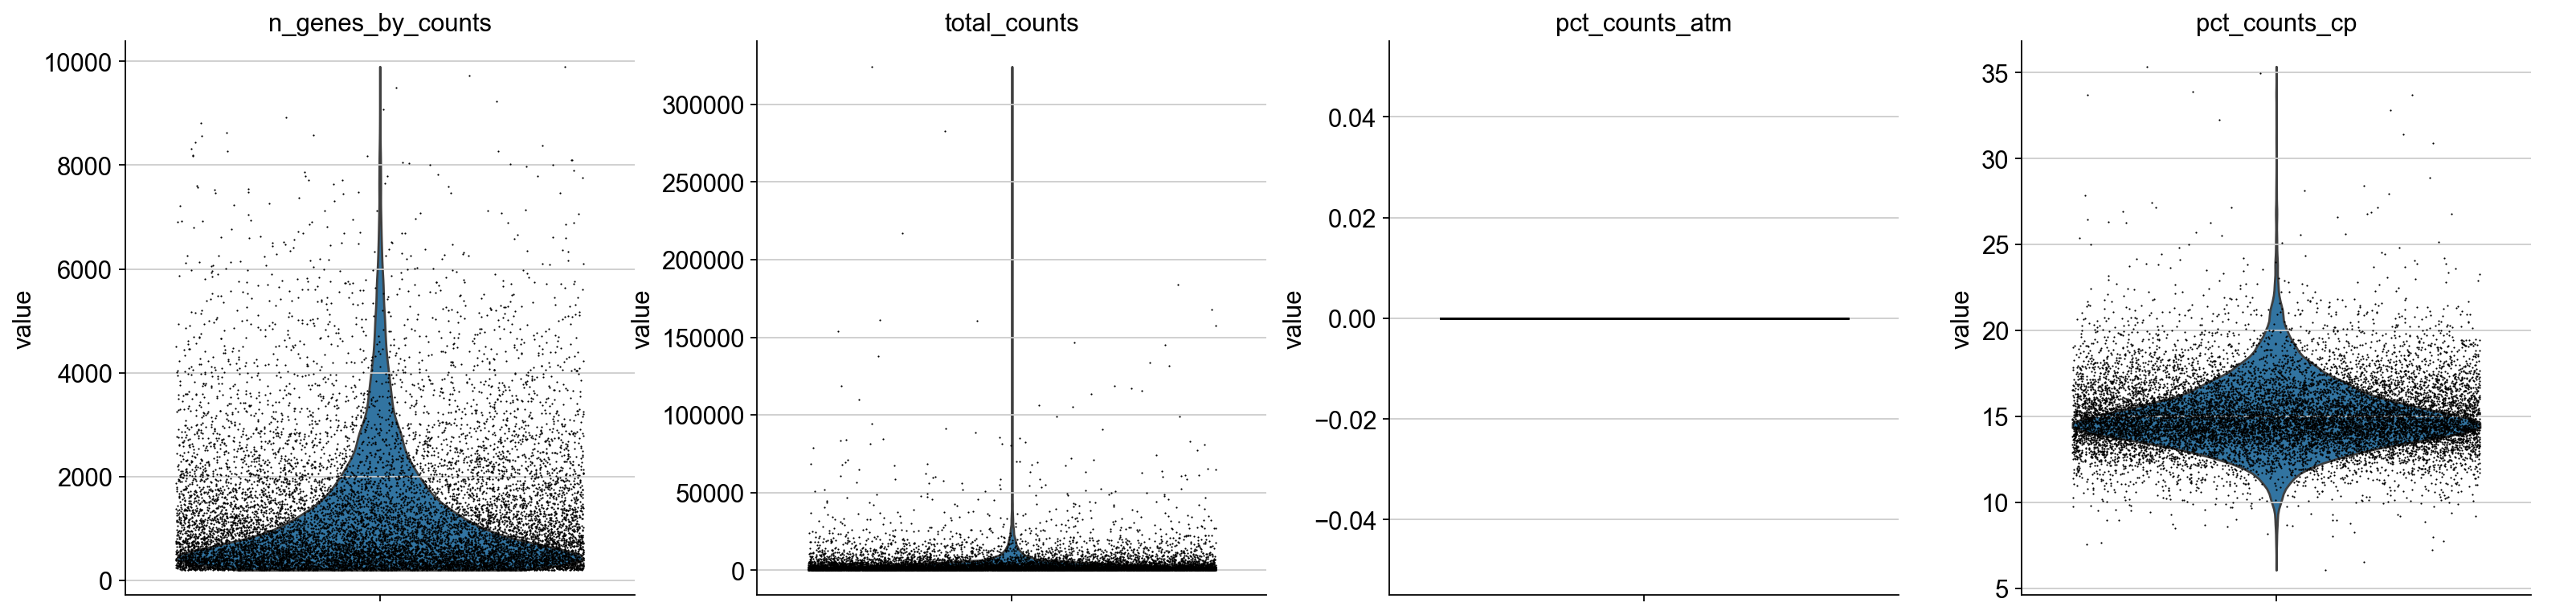

In [119]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_atm", "pct_counts_cp"],
    jitter=0.4,
    multi_panel=True
)

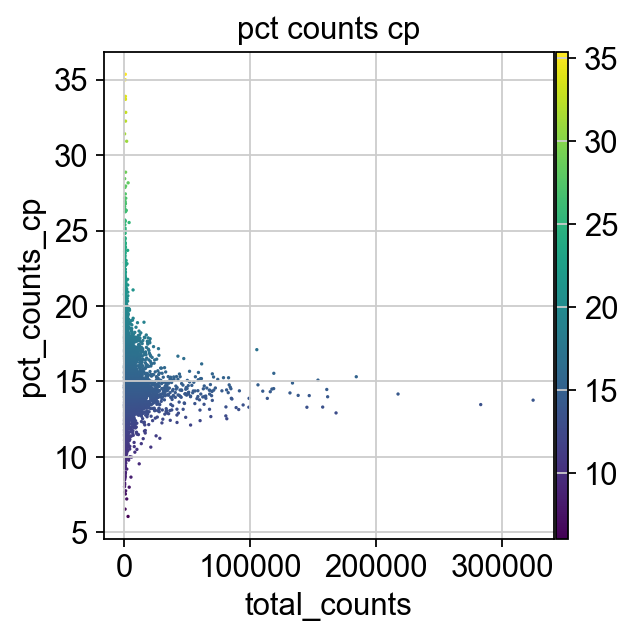

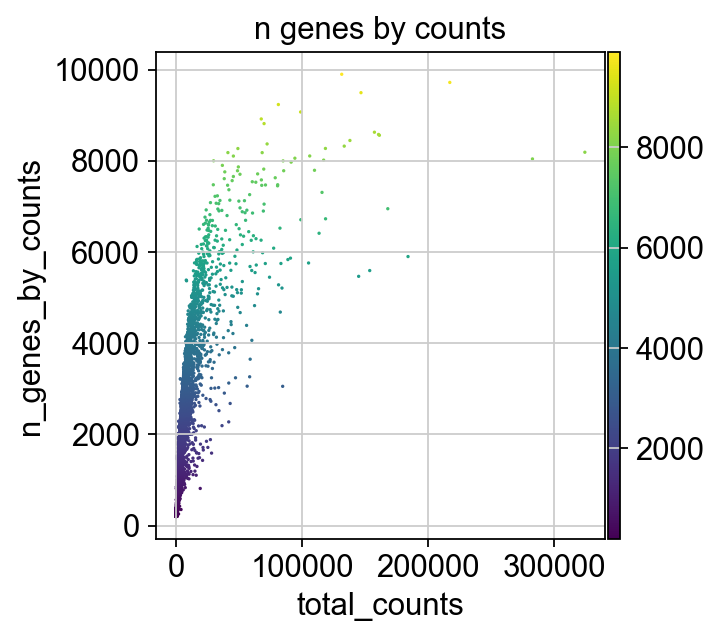

In [122]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_cp", color="pct_counts_cp")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts", color="n_genes_by_counts")

In [10]:
#Slicing the AnnData to filter more
adata = adata[adata.obs.n_genes_by_counts < 6000]
adata = adata[adata.obs.n_genes_by_counts > 500]
adata = adata[adata.obs.pct_counts_cp < 25, :].copy()

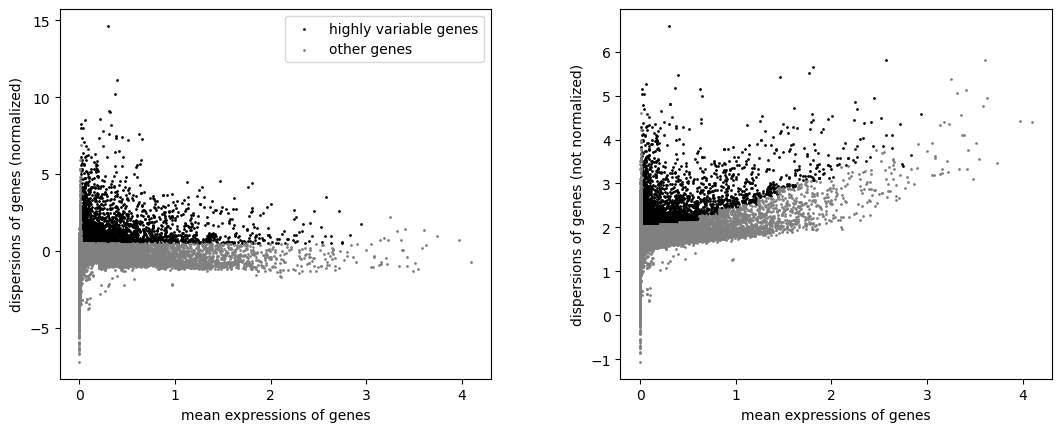

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)

#Logarithmize the data
sc.pp.log1p(adata)

#identify high varaibles
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

#plotting highly variable genes
sc.pl.highly_variable_genes(adata)

In [128]:
#Saving the rawdata
adata.raw = adata.copy()

In [12]:
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ["total_counts", "pct_counts_cp"])

sc.pp.scale(adata, max_value=10)

**PCA Component Analysis**

In [12]:
sc.tl.pca(adata, svd_solver="arpack")

In [133]:
adata.obs_names

Index(['AT1G01010\tAT1G01010', 'AT1G01020\tAT1G01020', 'AT1G01040\tAT1G01040',
       'AT1G01050\tAT1G01050', 'AT1G01060\tAT1G01060', 'AT1G01090\tAT1G01090',
       'AT1G01100\tAT1G01100', 'AT1G01120\tAT1G01120', 'AT1G01140\tAT1G01140',
       'AT1G01160\tAT1G01160',
       ...
       'ATMG00080\tATMG00080', 'ATMG00090\tATMG00090', 'ATMG00580\tATMG00580',
       'ATMG00690\tATMG00690', 'ATMG00830\tATMG00830', 'ATMG00980\tATMG00980',
       'ATMG00990\tATMG00990', 'ATMG01000\tATMG01000', 'ATMG01080\tATMG01080',
       'ATMG01190\tATMG01190'],
      dtype='object', length=9042)

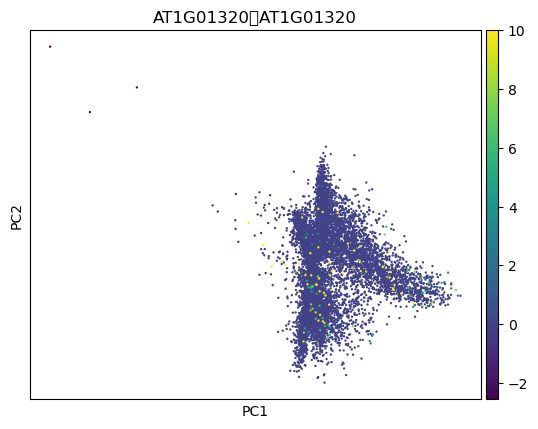

In [18]:
sc.pl.pca(adata, color="AT1G01320\tAT1G01320")

In [17]:
print(adata.var_names)

Index(['AT1G01320\tAT1G01320', 'AT1G01470\tAT1G01470', 'AT1G01480\tAT1G01480',
       'AT1G01490\tAT1G01490', 'AT1G01580\tAT1G01580', 'AT1G01680\tAT1G01680',
       'AT1G01725\tAT1G01725', 'AT1G01730\tAT1G01730', 'AT1G01750\tAT1G01750',
       'AT1G01760\tAT1G01760',
       ...
       'ATCG01070\tATCG01070', 'ATCG01110\tATCG01110', 'ATCG01120\tATCG01120',
       'ATCG01130\tATCG01130', 'ATCG01270\tATCG01270', 'ATCG01280\tATCG01280',
       'ATMG00030\tATMG00030', 'ATMG00080\tATMG00080', 'ATMG00090\tATMG00090',
       'ATMG00980\tATMG00980'],
      dtype='object', length=3101)


**Switching Gene names from stable id form to Gene Symbol**

In [13]:
#Switch the gene names to gene symbols for easier identificaiton
mapping = pd.read_csv("mart_export.txt", sep="\t", header=None)
mapping.columns = ["gene_id", "gene_symbols"]
mapping = mapping[mapping["gene_id"] != mapping["gene_symbols"]]
print(mapping.head())
print(f"Total mapped genes: {len(mapping)}")

            gene_id gene_symbols
0    Gene stable ID    Gene name
48        AT2G36307         ZPR4
85        AT2G39681         TAS2
112       AT3G17185         TAS3
125       AT1G50055        TAS1B
Total mapped genes: 11816


In [14]:
adata.var["gene_symbols"] = adata.var_names.map(dict(zip(mapping["gene_id"], mapping["gene_symbols"])))
print(adata.var["gene_symbols"].dropna().unique()[:20])

[]


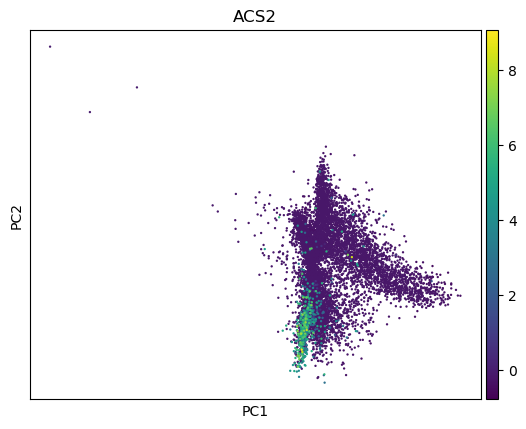

In [47]:
sc.pl.pca(adata, color="ACS2", gene_symbols="gene_symbols")


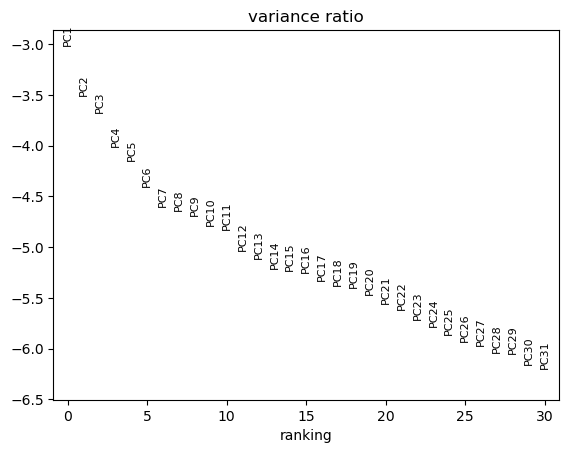

AnnData object with n_obs × n_vars = 10545 × 3101
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_atm', 'pct_counts_atm', 'total_counts_cp', 'pct_counts_cp'
    var: 'n_cells', 'atm', 'cp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_symbols'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [52]:
sc.pl.pca_variance_ratio(adata, log=True)
adata

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15)

In [16]:
sc.tl.umap(adata)

In [58]:
print(adata.var["gene_symbols"].dropna().unique()[:20])

['LEA14', 'ACS2', 'FRO2', 'PUB54', 'ADF11', ..., 'NLA', 'RALF1', 'GSTF7', 'GSTF6', 'PSAD-2']
Length: 20
Categories (1497, object): ['3xHMG-box1', '3xHMG-box2', '4CL1', '4CL3', ..., 'sks16', 'ycf2', 'ycf4', 'ycf15-A']


In [65]:
print(adata.var_names)

Index(['AT1G01320', 'AT1G01470', 'AT1G01480', 'AT1G01490', 'AT1G01580',
       'AT1G01680', 'AT1G01725', 'AT1G01730', 'AT1G01750', 'AT1G01760',
       ...
       'ATCG01070', 'ATCG01110', 'ATCG01120', 'ATCG01130', 'ATCG01270',
       'ATCG01280', 'ATMG00030', 'ATMG00080', 'ATMG00090', 'ATMG00980'],
      dtype='object', length=3101)


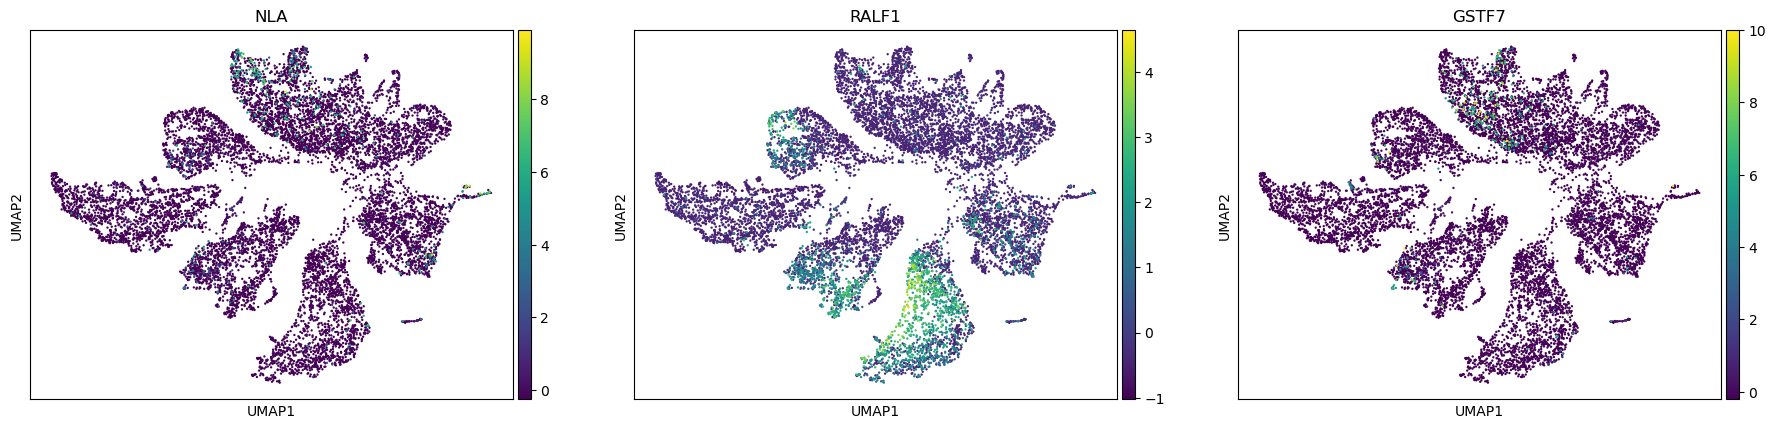

In [66]:
sc.pl.umap(adata, color=["NLA", "RALF1", "GSTF7"], gene_symbols="gene_symbols")

In [17]:
print(sc.__version__)
print(np.__version__)
print(igraph.__version__)
print(leidenalg.__version__)

1.11.1
1.26.4


NameError: name 'igraph' is not defined

In [ ]:
sc.tl.leiden(
    adata,
    resolution=1.2,
    random_state=0,
    flavor="igraph",
    directed=False,
)

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 780, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 780, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 780, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m